In [1]:
#bank.csv dataset
#classification algorithm 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset bank.csv
df=pd.read_csv("/content/sample_data/bank.csv")
#to display first 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
#check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
#to check datatype
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

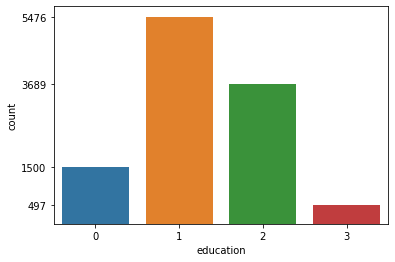

In [5]:
sns.countplot(data=df,x='education')
f=df['education'].value_counts()
plt.yticks(f)
plt.show()

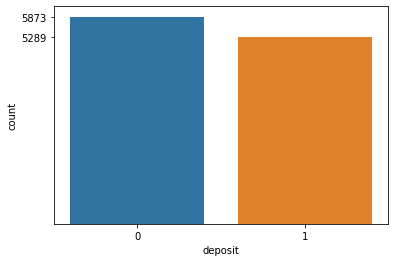

In [6]:
sns.countplot(data=df,x='deposit')
f=df['deposit'].value_counts()
plt.yticks(f)
plt.show()

In [7]:
#Select input and output from dataset
X=df.drop("deposit",axis=1)#input
Y=df["deposit"] #output

In [8]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
#Apply Standard scaler in input variable 
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [10]:
#Create a user defined function
def create_model(model): #user defined parameter as a object
    model.fit(X_train,Y_train) #training the model
    Y_pred=model.predict(X_test) #testing the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
#BaseLine model : USe Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

In [13]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [14]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1441  319]
 [ 359 1230]]


In [15]:
#here recall =0.77 means 77% it is good score  ,but we try , 
#can much more better to this score
#region behind less score : - model is overfit 

#we use second classification algorithm decisiontreeclassifier :
#DT help select imp input features  to predict the output

#call decisiontreeclassifier class

In [16]:
from sklearn.tree import DecisionTreeClassifier  

In [17]:
#Create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [18]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1760
           1       0.77      0.76      0.76      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1405  355]
 [ 385 1204]]


In [19]:
#Lets check out what are the important input features that are selected by the decisiontree gini
#index : -
#we use inbuilt method feature_importances_ of DecisionTreeClassifier class(show reduction 
#and select highest reduction)
IG=dt.feature_importances_
print(IG)

[0.07977152 0.03310531 0.01749396 0.01415085 0.00084141 0.08338981
 0.04281363 0.00564771 0.0615017  0.08033901 0.09709661 0.35403915
 0.01868825 0.06091749 0.01495684 0.03524674]


In [20]:
column=X.columns

In [21]:
dic={'Input':column,'Information_Gain':IG}
df1=pd.DataFrame(dic)

In [22]:
df1.sort_values('Information_Gain',ascending=False) #descending oder sort

,Input,Information_Gain
11,duration,0.354039
10,month,0.097097
5,balance,0.083390
9,day,0.080339
0,age,0.079772
8,contact,0.061502
13,pdays,0.060917
6,housing,0.042814
15,poutcome,0.035247
1,job,0.033105


In [23]:
from sklearn import tree
#create a tree
#create the tree 
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt,feature_names=features,filled=True)

<Figure size 1440x1440 with 0 Axes>

In [24]:
dt1=DecisionTreeClassifier(max_depth=8)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1464  296]
 [ 309 1280]]


In [25]:
dt2=DecisionTreeClassifier(max_depth=7)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.82      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.82      0.82      0.82      3349

[[1454  306]
 [ 313 1276]]


In [26]:
dt3=DecisionTreeClassifier(max_depth=6)
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1760
           1       0.77      0.84      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1352  408]
 [ 258 1331]]


In [27]:
dt1=DecisionTreeClassifier(max_depth=5)
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1316  444]
 [ 229 1360]]


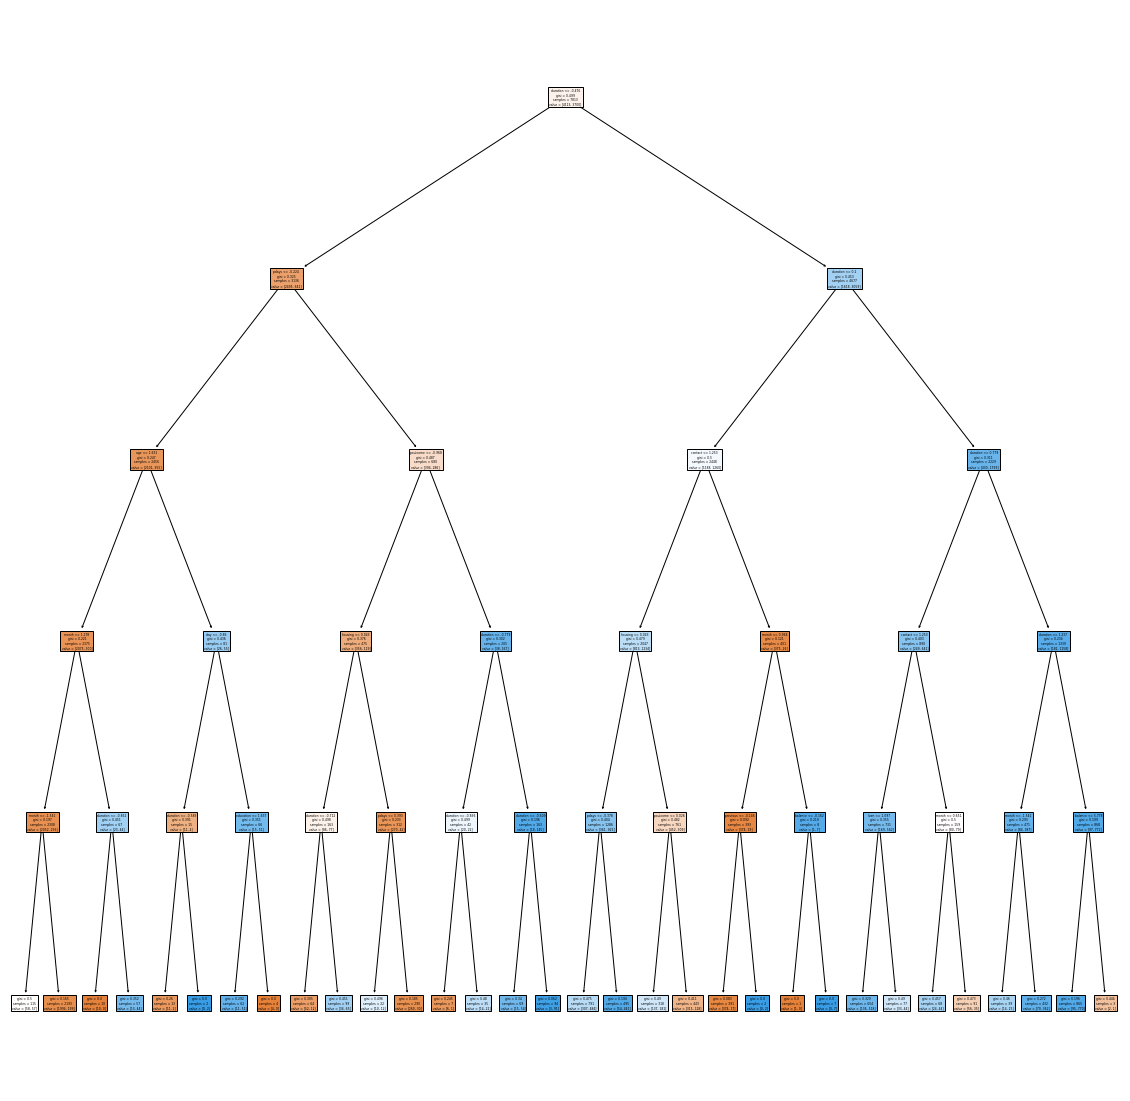

In [28]:
from sklearn import tree
#create a tree
#create the tree 
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [29]:
IG=dt1.feature_importances_

In [30]:
column=X.columns
dic={'Input':column,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values('Information_Gain',ascending =False)

,Input,Information_Gain
11,duration,0.576413
8,contact,0.119728
13,pdays,0.076609
15,poutcome,0.067439
6,housing,0.066337
10,month,0.052438
0,age,0.026846
7,loan,0.003762
9,day,0.003512
3,education,0.002853


In [31]:
dt2=DecisionTreeClassifier(min_samples_leaf=50)

In [32]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1760
           1       0.78      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1378  382]
 [ 204 1385]]


In [33]:
IG=dt2.feature_importances_

In [34]:
column=X.columns
dic={'Input':column,'Information_Gain':IG}
df2=pd.DataFrame(dic)
df2.sort_values('Information_Gain',ascending =False)

,Input,Information_Gain
11,duration,0.499270
10,month,0.109344
8,contact,0.106134
6,housing,0.068702
15,poutcome,0.059791
0,age,0.043692
13,pdays,0.043444
14,previous,0.036101
5,balance,0.018311
1,job,0.004952


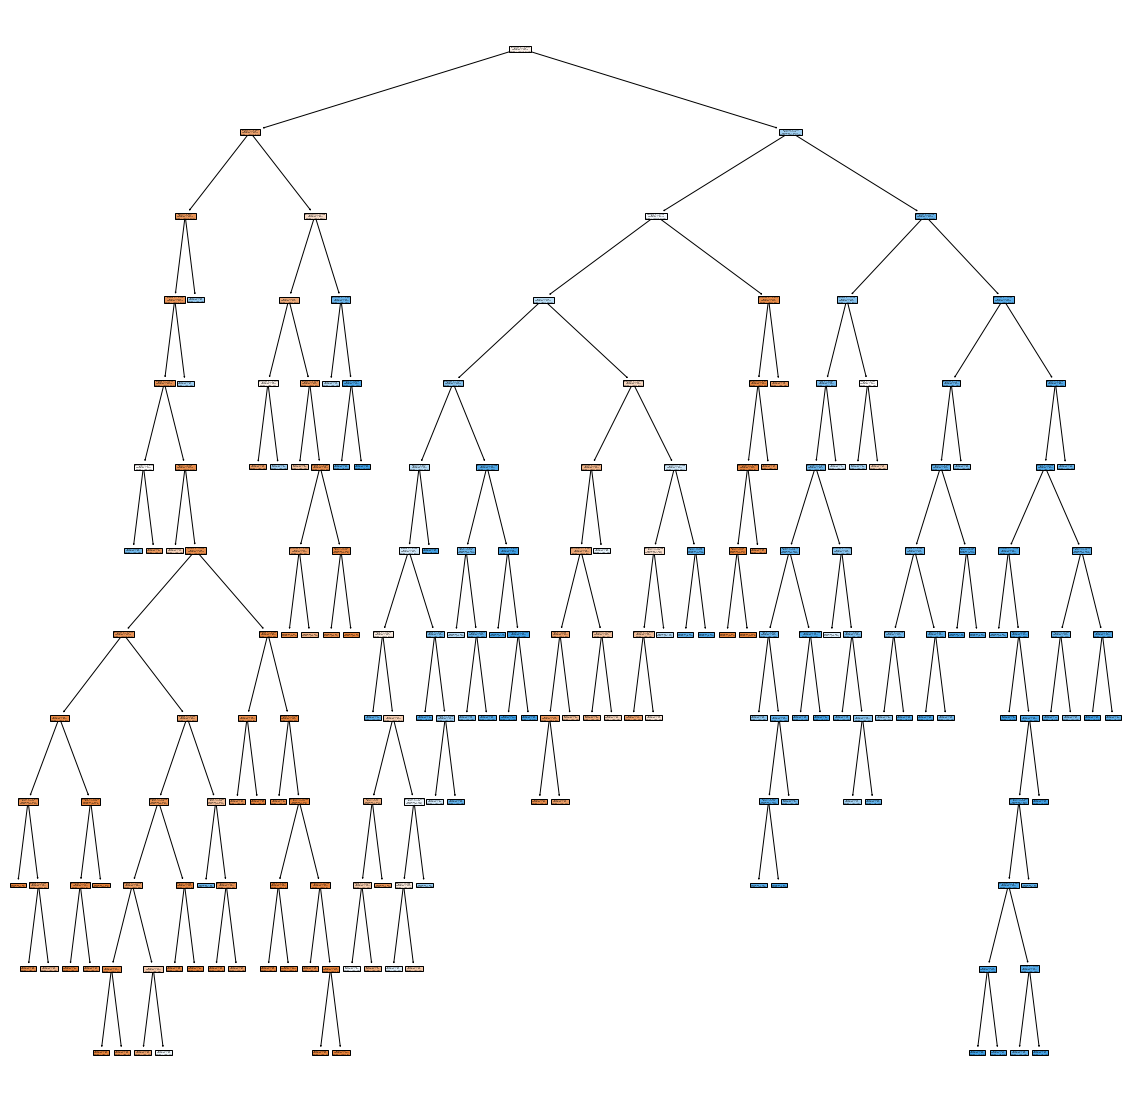

In [35]:
from sklearn import tree
#create a tree
#create the tree 
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [36]:
dt3=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50)

In [37]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1450  310]
 [ 285 1304]]


In [38]:
IG=dt3.feature_importances_

In [39]:
column=X.columns
dic={'Input':column,'Information_Gain':IG}
df3=pd.DataFrame(dic)
df3.sort_values('Information_Gain',ascending =False)

,Input,Information_Gain
11,duration,0.509653
8,contact,0.144096
10,month,0.108809
6,housing,0.060015
14,previous,0.041418
5,balance,0.028565
15,poutcome,0.025703
13,pdays,0.023556
0,age,0.020787
9,day,0.014246


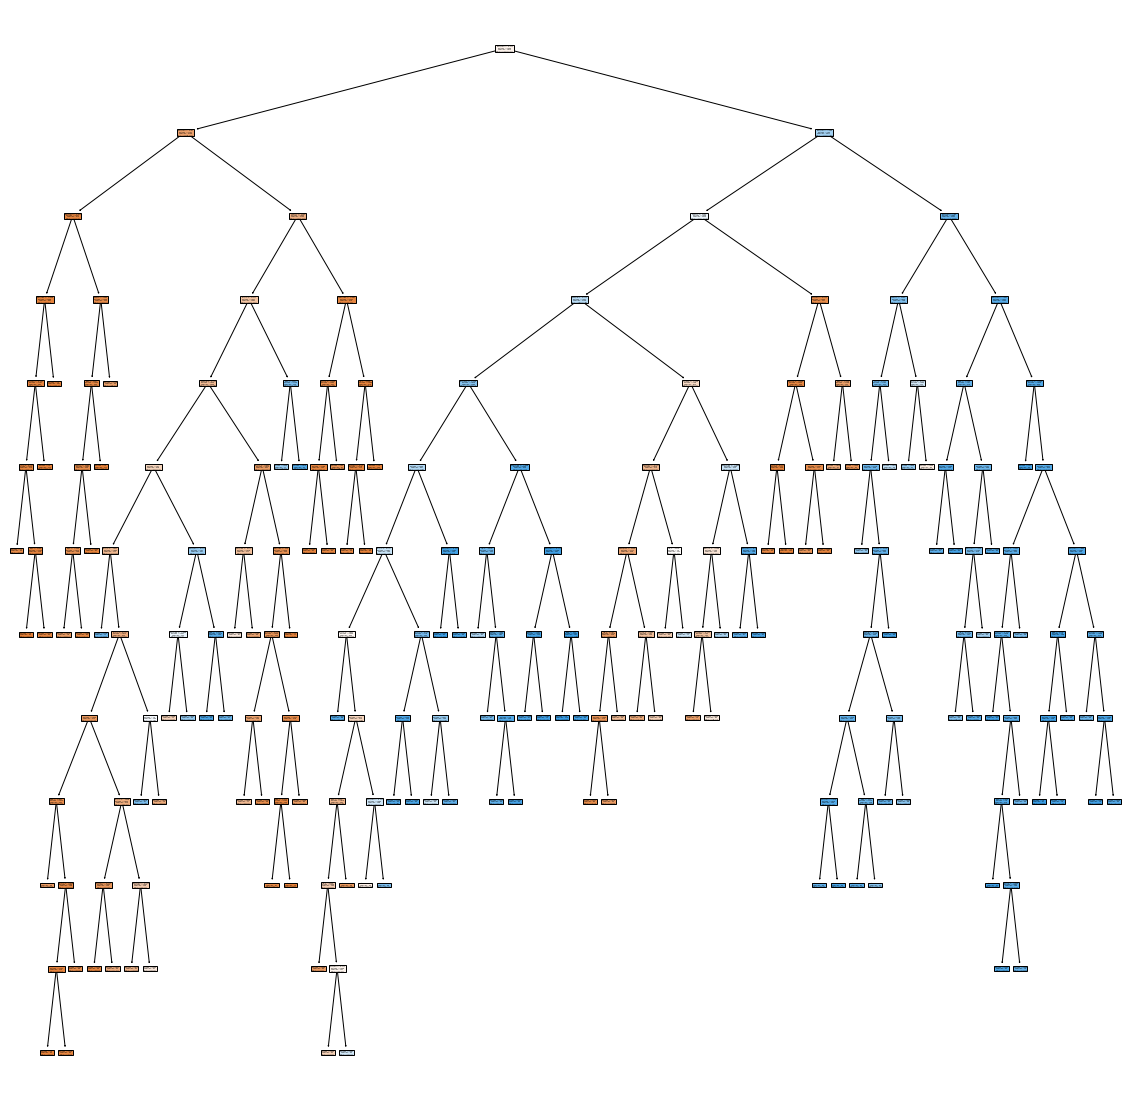

In [40]:
from sklearn import tree
#create a tree
#create the tree 
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

The best out of the above two is min_samples_leaf because of 87%, and entropy gives 82% instead. This is checked in the ***RECALL PART***



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1760
           1       0.82      0.83      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

[[1477  283]
 [ 266 1323]]


Check with other max_features as well, for getting the best result, after saving the previous ones in a text.